In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
X = iris.data[:, :2]  
y = iris.target

In [4]:
X = X[y != 2]
y = y[y != 2]
y = np.where(y == 0, -1, 1)  # Relabel for SVM: Setosa -> -1, Versicolor -> +1

In [12]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [5]:
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y)

SVC(kernel='linear')

In [6]:
w = clf.coef_[0]
b = clf.intercept_[0]
slope = -w[0] / w[1]
intercept = -b / w[1]
margin = 1 / np.sqrt(np.sum(w ** 2))

In [7]:
w

array([ 2.22720466, -2.24959915])

In [8]:
X[:, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7])

In [9]:
print("Support Vectors:")
print(clf.support_vectors_)

Support Vectors:
[[4.9 3. ]
 [5.7 3.8]
 [5.4 3.4]
 [5.  3. ]
 [5.4 3.4]
 [5.5 3.5]
 [4.5 2.3]
 [4.8 3. ]
 [4.9 2.4]
 [5.2 2.7]
 [5.6 3. ]
 [5.9 3.2]
 [5.4 3. ]
 [6.  3.4]
 [5.6 3. ]
 [5.1 2.5]]


In [10]:
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
decision_boundary = slope * x_vals + intercept
margin_up = decision_boundary + margin
margin_down = decision_boundary - margin

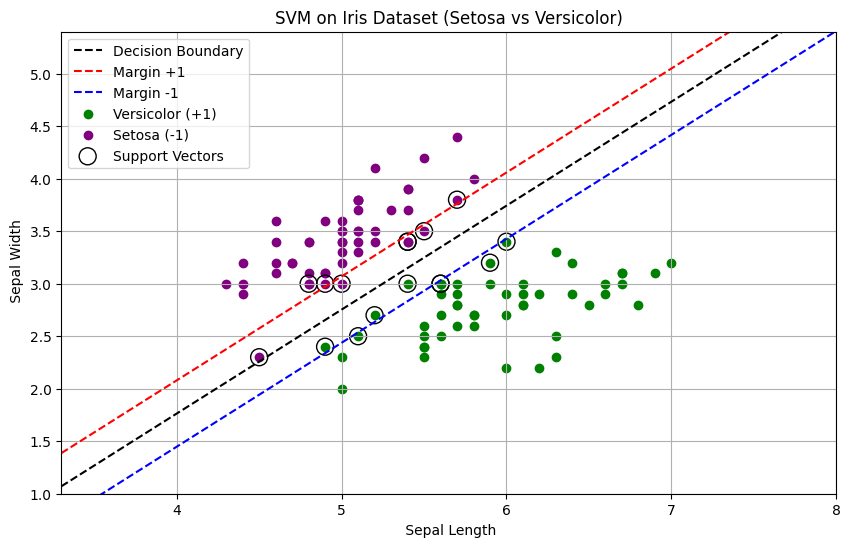

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(x_vals, decision_boundary, 'k--', label='Decision Boundary')
plt.plot(x_vals, margin_up, 'r--', label='Margin +1')
plt.plot(x_vals, margin_down, 'b--', label='Margin -1')
# Plot the data points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Versicolor (+1)')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='purple', label='Setosa (-1)')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
            s=150, facecolors='none', edgecolors='black', label='Support Vectors')
# Labels and aesthetics
plt.xlabel(' Sepal Length')
plt.ylabel(' Sepal Width')
plt.title('SVM on Iris Dataset (Setosa vs Versicolor)')
plt.legend()
plt.grid(True)
plt.xlim(x_vals.min(), x_vals.max())
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.show()
